### Importing dependencies

In [1]:
import numpy as np
import pandas as pd

from datetime import datetime, timedelta

from matplotlib import pyplot as plt
from matplotlib import dates as dt_


<a href = "https://www.youtube.com/watch?v=UO98lJQ3QGI&list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_">Video Series</a>

In [2]:
plt.style.use('dark_background')

### Time Series 

Let's create a some random data for a week's time frame.

In [3]:
dates = [
        datetime(2021, 5, 19),
        datetime(2021, 5, 20),
        datetime(2021, 5, 21),
        datetime(2021, 5, 22),
        datetime(2021, 5, 23),
        datetime(2021, 5, 24),
        datetime(2021, 5, 25),
]

y = [1, 3, 2, 7, 3, 5, 2]

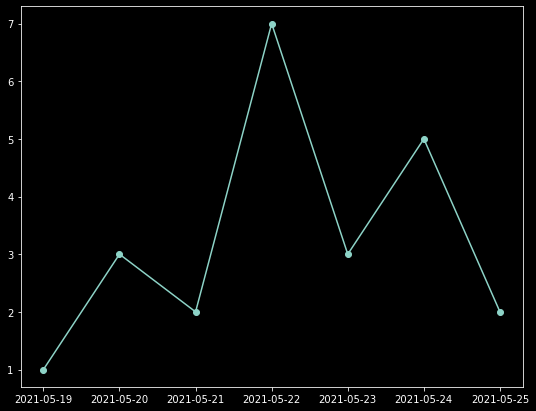

In [4]:
plt.figure(figsize=(9,7))
plt.plot_date(dates, y, linestyle='solid')

#### Let's make the plot look a little bit better. One way to do that would be to run the autofmt_xdate method on our figure and this will rotate the date so that the fit nicely. This is going to be a method on our figure and not on the pyplot object(plt) 

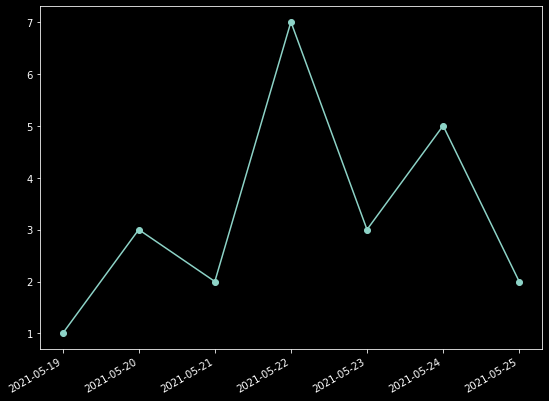

In [5]:
plt.figure(figsize=(9,7))
plt.plot_date(dates, y, linestyle='solid')
plt.gcf().autofmt_xdate()                      #plt.gcf() - To get the current figure from pyplot
plt.show()

 #### Let' say we want the dates to be displayed by the name of the month first and then the year and then the date. We need to format the dates using the datatime module.

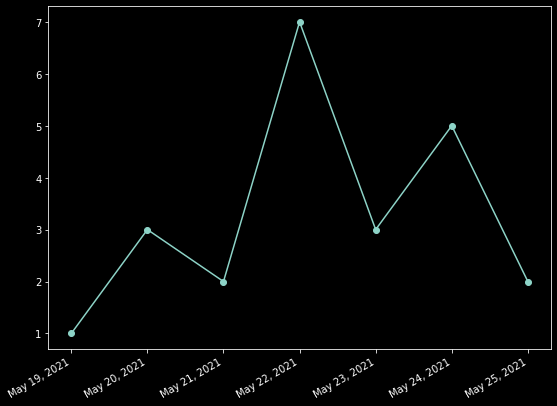

In [6]:
plt.figure(figsize=(9,7))
plt.plot_date(dates, y, linestyle='solid')
plt.gcf().autofmt_xdate()                      

date_format = dt_.DateFormatter('%b %d, %Y')


## Now we need to see this as the format of our x-axis. To do that first we need to get the x-axis

plt.gca().xaxis.set_major_formatter(date_format)           #plt.gca() - gets the axis

plt.show()

### Let's now work with a csv file containing Bitcoin prices over a certain period of time.

In [7]:
df_bitcoin = pd.read_csv('bitcoin_prices.csv')
df_bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-18,7266.080078,8281.660156,7257.259766,8193.139648,8193.139648,723011166
1,2019-05-19,8193.139648,8193.139648,7591.850098,7998.290039,7998.290039,637617163
2,2019-05-20,7998.290039,8102.319824,7807.770020,7947.930176,7947.930176,357803946
3,2019-05-21,7947.930176,8033.759766,7533.660156,7626.890137,7626.890137,424501866
4,2019-05-22,7626.890137,7971.259766,7478.740234,7876.500000,7876.500000,386766321


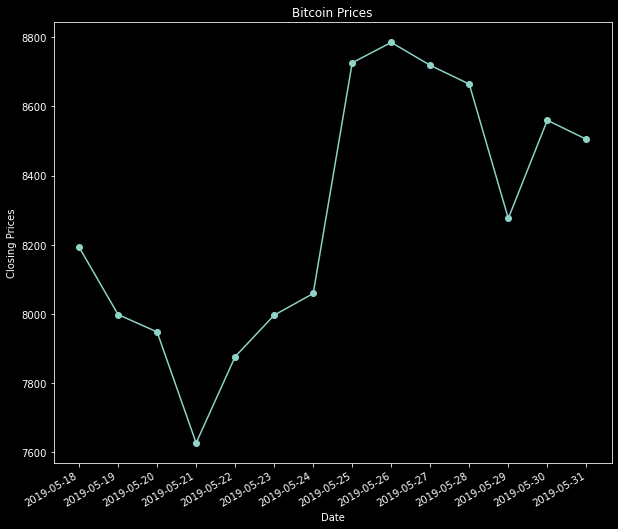

In [8]:
plt.figure(figsize=(10,9))
plt.plot_date(df_bitcoin['Date'], df_bitcoin['Close'], linestyle='solid')
plt.gcf().autofmt_xdate()
plt.title('Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.show()

#### This may look correct but it's not. Right now, the x-axis is not plotted as a date but rather as a string.

To observe this, if we go to our csv and add an extra date May 17, 2019; the plot will have the date at the end rather than being present in the beginning which doesn't make sense.

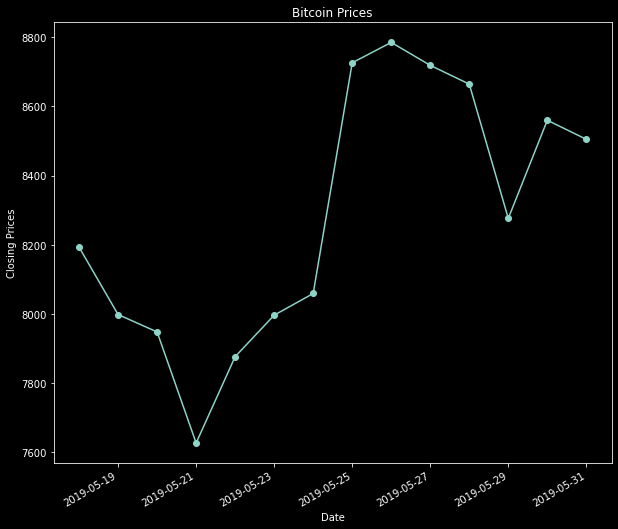

In [9]:
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_bitcoin.sort_values(by='Date', inplace=True)

plt.figure(figsize=(10,9))
plt.plot_date(df_bitcoin['Date'], df_bitcoin['Close'], linestyle='solid')
plt.gcf().autofmt_xdate()
plt.title('Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.show()

### Real time Time Series data

In [10]:
from itertools import count

#### First we look at some sample data and then we will look at real world data from a csv file.

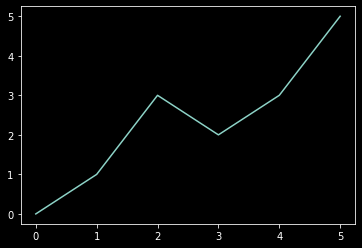

In [11]:
x_vals = [0, 1, 2, 3, 4, 5]
y_vals = [0, 1, 3, 2, 3, 5]

plt.plot(x_vals, y_vals)
plt.show()

In [12]:
x_values, y_values = [], []

#### So, now what we want is to plot a time series data as the values for x and y come in 

In [13]:
index = count()
def animate(i):
    x_values.append(next(index))                    # starting from 0, next(index) gives the next number each time the function is run.
    y_values.append(np.random.randint(0,10))        # y_list will contain random values from 0 to 10
    plt.plot(x_values, y_values, linewidth=2)
    if i == 10:
        anim.event_source.stop()

#### Let's say we want to run this function every second and plot these values that are getting appnded to the list

#### To do this, we can use the  func_animation class from the matplotlib animation module.

In [14]:
from matplotlib.animation import FuncAnimation

#### Now, let's tell matplotlib that we want to run that function on a specific time interval

In [15]:
from IPython.display import HTML

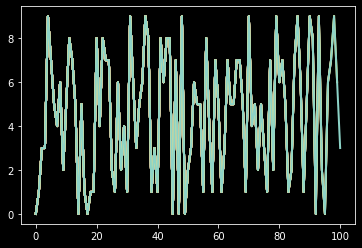

In [16]:
anim = FuncAnimation(plt.gcf(), animate, interval=1000)   # first we pass the figure we want to animate, function, interval in milliseconds
HTML(anim.to_html5_video())                                 #conda install -c conda-forge ffmpeg for this to work

#### We can see that we get an updating chart but we are getting all kinds of different colors. The reason is because our plot method is actually plotting a brand new line everytime but its not clearing out the old lines. So, there are multiple lines getting stacked on top of each other. One way to solve this problem is to simply clear out our axis.

In [19]:
x_values, y_values = [], []

In [20]:
index = count()
def animate(i):
    x_values.append(next(index))  
    y_values.append(np.random.randint(0,10)) 
    plt.cla()
    plt.plot(x_values, y_values, linewidth=2, color='yellow')

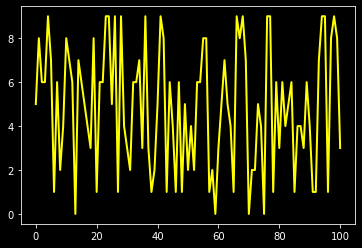

In [21]:
anim2 = FuncAnimation(plt.gcf(), animate, interval=1000) 
HTML(anim2.to_html5_video())                                

### Now we will work with a csv with data which is constantly being updated. The csv can fetch data from any source.